## LGBT Equality Index - Web scraping

The Equality Index measures the current status of LGBT rights, laws, and freedoms as well as public attitudes towards LGBT people, from 0 (Less Equal) to 100 (Most Equal). Equaldex is a collaborative knowledge base for the LGBT (lesbian, gay, bisexual, transgender) movement, aiming to crowdsource every law related to LGBT rights to provide a comprehensive and global view of the LGBT rights movement.

In [5]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [6]:
url = "https://www.equaldex.com/equality-index"

In [7]:
equality = requests.get(url)
equality.text

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en">\n<head>\n<title>LGBT Equality Index | Equaldex</title>\n<meta name="title" content="LGBT Equality Index | Equaldex" />\n<meta name="description" content="Equaldex is a collaborative knowledge base for the LGBTQ+ (lesbian, gay, bisexual, transgender) movement, visualizing LGBTQ+ rights through maps, timelines, and data." />\n<meta name="keywords" content="LGBT Rights, Gay Marriage, Human Rights, Equality, Data, LGBT Database, LGBT Rights By Country, Equaldex, Equalitopia, Equality, Gay Rights" />\n<meta http-equiv="Content-Type" content="text/html; charset=iso-8859-1" />\n<link rel="shortcut icon" href="/favicon.png">\n<link href="/css/style.css?6" rel="stylesheet" type="text/css" />\n<meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=0" />\n<link href=\'//fonts.google

In [8]:
soup = BeautifulSoup(equality.text, 'html.parser')
print(soup.prettify())

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">
<html xml:lang="en" xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <title>
   LGBT Equality Index | Equaldex
  </title>
  <meta content="LGBT Equality Index | Equaldex" name="title"/>
  <meta content="Equaldex is a collaborative knowledge base for the LGBTQ+ (lesbian, gay, bisexual, transgender) movement, visualizing LGBTQ+ rights through maps, timelines, and data." name="description"/>
  <meta content="LGBT Rights, Gay Marriage, Human Rights, Equality, Data, LGBT Database, LGBT Rights By Country, Equaldex, Equalitopia, Equality, Gay Rights" name="keywords"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <link href="/favicon.png" rel="shortcut icon"/>
  <link href="/css/style.css?6" rel="stylesheet" type="text/css">
   <meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=0" name="viewport"/>
   <link href="//fonts.go

In [27]:
#Find the table that follows the 'World Equality Index' headline tag 

equal_index_table = soup.find('h2', text='World Equality Index').find_next('table')

#Create a list to store the data

equal_index_list = []

#For each row in the table, create a list with the text extracted from each <td> data, and store it in our previously created list

for row in equal_index_table.find_all('tr'):
    data = [td.text.strip() for td in row.find_all('td')]
    
    #for the first <td> in each row ('001. Country'), we split the string on the '.'
    #and ignore the figure that precedes it, storing only the country name
    if data:
        data[0] = data[0].split('. ')[1]
    equal_index_list.append(data)

#column index
columns =['country_name','lgbt_equality_index', 'Legal Index', 'Public Opinion Index']

#Create DataFrame
equal_df = pd.DataFrame(equal_index_list, columns = columns)

#Display the DataFrame starting from the second row (the first is blank)
print(equal_df[1:])

#export to CSV
#equal_df[1:].to_csv('lgbt_equality_index.csv')

    country_name lgbt_equality_index Legal Index Public Opinion Index
1        Iceland            90 / 100    94 / 100             86 / 100
2         Canada                  90         100                   79
3        Uruguay                  86         100                   73
4         Norway                  86          90                   81
5        Denmark                  86          98                   73
..           ...                 ...         ...                  ...
193   Mauritania                   3           0                    5
194      Somalia                   2           2                    —
195  Afghanistan                   2           2                    2
196       Brunei                   2           2                    —
197        Yemen                   0           0                    —

[197 rows x 4 columns]


In [2]:
# conda install pandas fiona shapely pyproj rtree
# pip install geopandas

import geopandas as gpd
import matplotlib.pyplot as plt

df_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
print(f"{type(df_world)}, {df_world.geometry.name}")
print(df_world.head())
print(df_world.geometry.geom_type.value_counts())

<class 'geopandas.geodataframe.GeoDataFrame'>, geometry
       pop_est      continent                      name iso_a3  gdp_md_est  \
0     889953.0        Oceania                      Fiji    FJI        5496   
1   58005463.0         Africa                  Tanzania    TZA       63177   
2     603253.0         Africa                 W. Sahara    ESH         907   
3   37589262.0  North America                    Canada    CAN     1736425   
4  328239523.0  North America  United States of America    USA    21433226   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  
Polygon         148
MultiPolygon     29
dtype: int64


<AxesSubplot:>

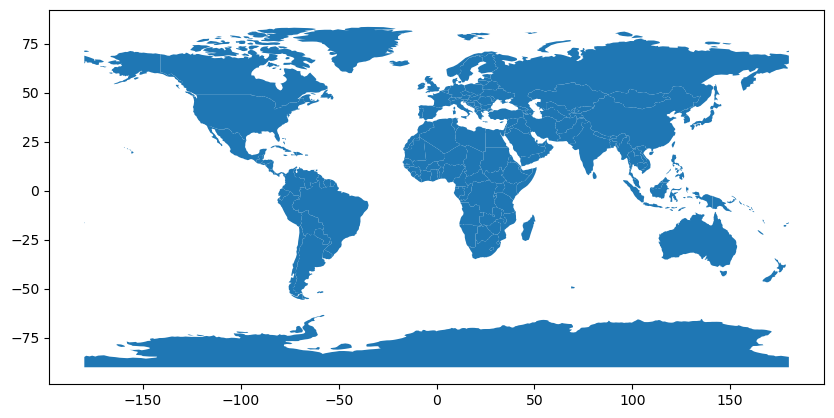

In [3]:
df_world.plot(figsize=(10,6))

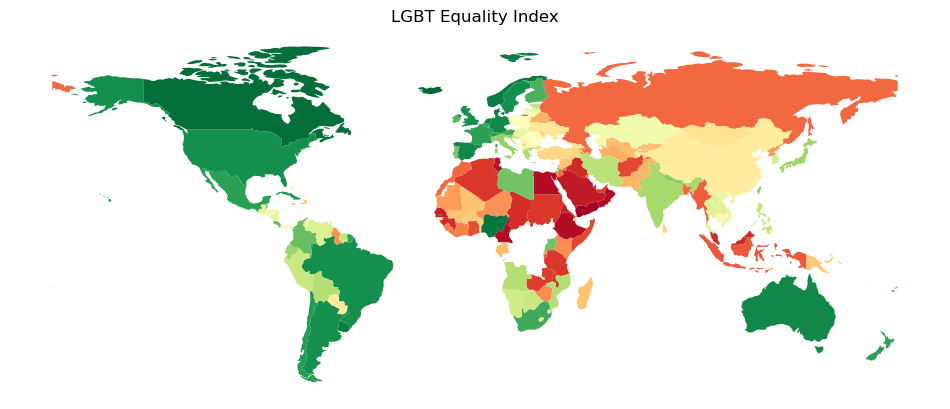

In [51]:
# Rename the 'lgbt_equality_index' column to 'LGBT Equality Index'
equal_df = equal_df.rename(columns={'lgbt_equality_index': 'LGBT Equality Index'})

#We need to rename some countries to make them match with the df_world data frame
#nb: unable to solve the Dem. Rep. of Congo!
equal_df.loc[equal_df['country_name'] == 'United States', 'country_name'] = 'United States of America'
equal_df.loc[equal_df['country_name'] == 'Democratic Republic of the Congo', 'country_name'] = 'Congo, Democratic Republic of the'
equal_df.loc[equal_df['country_name'] == 'C\364te d\u2019Ivoire', 'country_name'] = "Côte d'Ivoire"

# Merge the data with the shapefile based on the country names
merged = df_world.merge(equal_df, left_on='name', right_on='country_name')

# Plot the data on a world map
fig, ax = plt.subplots(figsize=(12,8))
ax.set_aspect('equal')

# Color scheme from red to yellow and green

merged.plot(column='LGBT Equality Index', cmap='RdYlGn', legend=False, ax=ax)

ax.set_title('LGBT Equality Index')

#Remove the axis
ax.axis('off')

plt.show()